# K-Means 군집

#### 군집(clustering)
군집 분석은 데이터셋의 관측값이 갖고 있는 여러 속성을 분석하여 서로 비슷한 특징을 같는 관측값끼리 같은 집단으로 묶는 알고리즘

다른 집단 간에는 서로 완전하게 구분되는 특징을 갖기 때문에 어느 집단에도 속하지 못하는 관측값이 존재할 수 있음

이런 특성을 이용해 특정 데이터(이상값, 중복값)를 찾는데 활용가능

군집 분석은 비지도학습!

관측값을 몇 개의 집단으로 나눈다는 점에서 지도학습의 분류 알고리즘과 비슷하지만

군집 분석은 정답이 없는 상태에서 데이터 자체의 유사성만을 기준으로 판단한다는 점에서 정답을 알고 있는 상태에서 학습 과정을 거치는 분류 알고리즘과는 차이가 있음

### k-Means
k-Means 알고리즘은 데이터 간의 유사성을 측정하는 기준으로 각 클러스터의 중심까지의 거리를 이용

벡터 공간에 위치한 어떤 데이터에 대하여 k개의 클러스터가 주어졌을 때 클러스터의 중심까지 거리가 가장 가까운 클러스터로 해당 데이터를 할당

다른 클러스터 간에는 서로 완전하게 구분하기 위하여 일정한 거리 이상 떨어져야 함

한편 몇 개의 클러스터로 데이터를 구분할 것인지를 결정하는 k 값에 따라 모형의 성능이 달라짐

일반적으로 k가 클수록 모형의 정확도는 개선되지만, k 값이 너무 커지면 선택지가 너무 많아지므로 분석의 효과가 사라짐

![009-1](https://user-images.githubusercontent.com/63298243/119340766-ec144100-bccd-11eb-9b3a-6229caebfaea.png)

![Kmeans_animation_withoutWatermark](https://user-images.githubusercontent.com/63298243/126041215-aafdf5d5-04a3-4f2b-b526-8365c1fdfc8f.gif)

## Import lib & data

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns

### 도매 고객 데이터 세트
각 고객의 연간 구매금액을 상품 카테고리별로 구분하여 정리한 데이터

첫 2개 열은 상품 구매금액이 아니라 고객의 일반 정보를 담고있음

'Channel' 열은 호텔 / 레스토랑 또는 소매점 등 판매채널 값이고, 'Region' 열은 고객 소재지를 나타냄

In [2]:
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)

In [3]:
df

Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185  
..          ...  
435        2204  
436        2346  
437        1867  
438        2125  
439          52  

[440 rows x 8 columns]

### 전처리

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
df.describe()

Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
50%     1526.000000        816.500000    965.500000  
75%     3554.250000       3922.000000   1820.250000  
max    60869.000000      40827.000000  47943.000000

### 모델링

#### KMeans 예시
KMeans(init='k-means++', n_clusters=8, n_init=10)

#### 파라미터 설명

1. n_clusters int, 기본값 = 8
     - 형성 할 클러스터의 수와 생성 할 중심의 수

2. n_init int, 기본값 = 10
    - k- 평균 알고리즘이 다른 중심 시드로 실행되는 횟수
    - 최종 결과는 n_init 연속 실행의 최상의 출력

모델을 훈련(fit)시키면 아래처럼 "labels_" 이 만들어짐

이를 우리의 데이터프레임에 추가시켜 시각화하면 됨

In [8]:
X = df #독립변수
X.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [9]:
X = preprocessing.StandardScaler().fit(X).transform(X)

In [10]:
km = KMeans(init='k-means++', n_clusters=8, n_init=10)

In [11]:
km.fit(X) 

KMeans()

In [12]:
km.labels_

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       4, 2, 0, 0, 1, 1, 2, 4, 1, 1, 1, 4, 1, 0, 4, 0, 0, 4, 4, 1, 0, 2,
       0, 2, 2, 7, 0, 2, 1, 1, 4, 0, 1, 1, 2, 0, 1, 1, 0, 7, 0, 0, 1, 7,
       1, 0, 1, 1, 1, 4, 1, 0, 0, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 7, 7, 4,
       1, 4, 1, 1, 2, 6, 0, 1, 0, 1, 1, 1, 0, 0, 0, 4, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 4, 4, 1, 0, 1, 4, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 1,
       1, 2, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 2, 1, 0, 1, 0,
       4, 1, 1, 1, 1, 4, 1, 5, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 4, 0,
       3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 0, 3, 2, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3,
       2, 3, 2, 3, 2, 3, 3, 3, 3, 4, 1, 1, 4, 1, 1, 0, 1, 0, 4, 4, 4, 4,
       1, 1, 1, 4, 1, 1, 1, 0, 3, 0, 3, 0, 0, 3, 0,

In [13]:
label = km.labels_   

In [14]:
df['Cluster'] = label
df

Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0          2       3  12669   9656     7561     214              2674   
1          2       3   7057   9810     9568    1762              3293   
2          2       3   6353   8808     7684    2405              3516   
3          1       3  13265   1196     4221    6404               507   
4          2       3  22615   5410     7198    3915              1777   
..       ...     ...    ...    ...      ...     ...               ...   
435        1       3  29703  12051    16027   13135               182   
436        1       3  39228   1431      764    4510                93   
437        2       3  14531  15488    30243     437             14841   
438        1       3  10290   1981     2232    1038               168   
439        1       3   2787   1698     2510      65               477   

     Delicassen  Cluster  
0          1338        0  
1          1776        0  
2          7844        0  
3          1788        1  
4          5185        0  
..          ...      ...  
435        2204        4  
436        2346        4  
437        1867        2  
438        2125        1  
439          52        1  

[440 rows x 9 columns]

## 결과물 시각화
지도 학습에서의 시각화는 모델을 돌리기전에 이상치 등을 탐지하기 위해서라면

비지도 학습에서의 시각화는 군집화가 제대로 되었는지, 혹은 결과의 해석을 위해 시각화를 한다

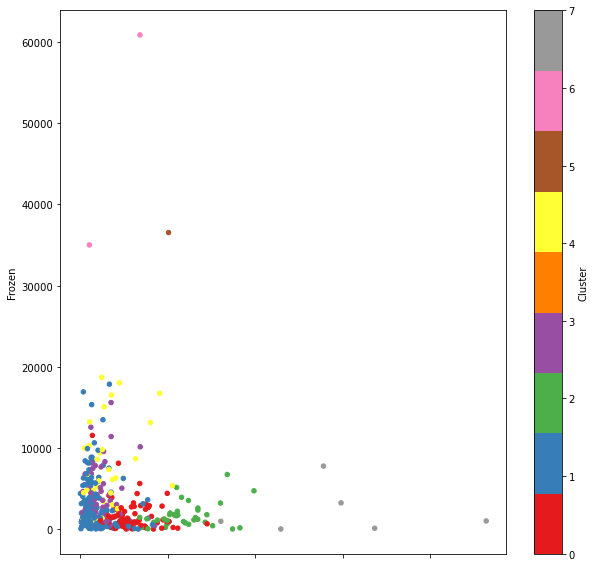

In [17]:
df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()

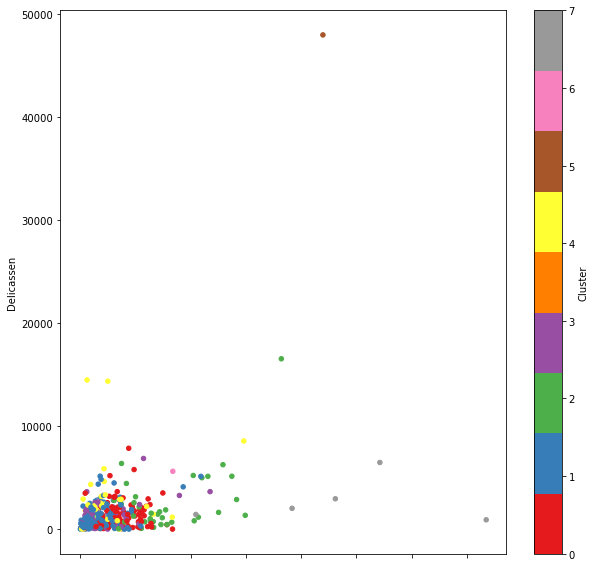

In [18]:
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, figsize=(10, 10))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnin

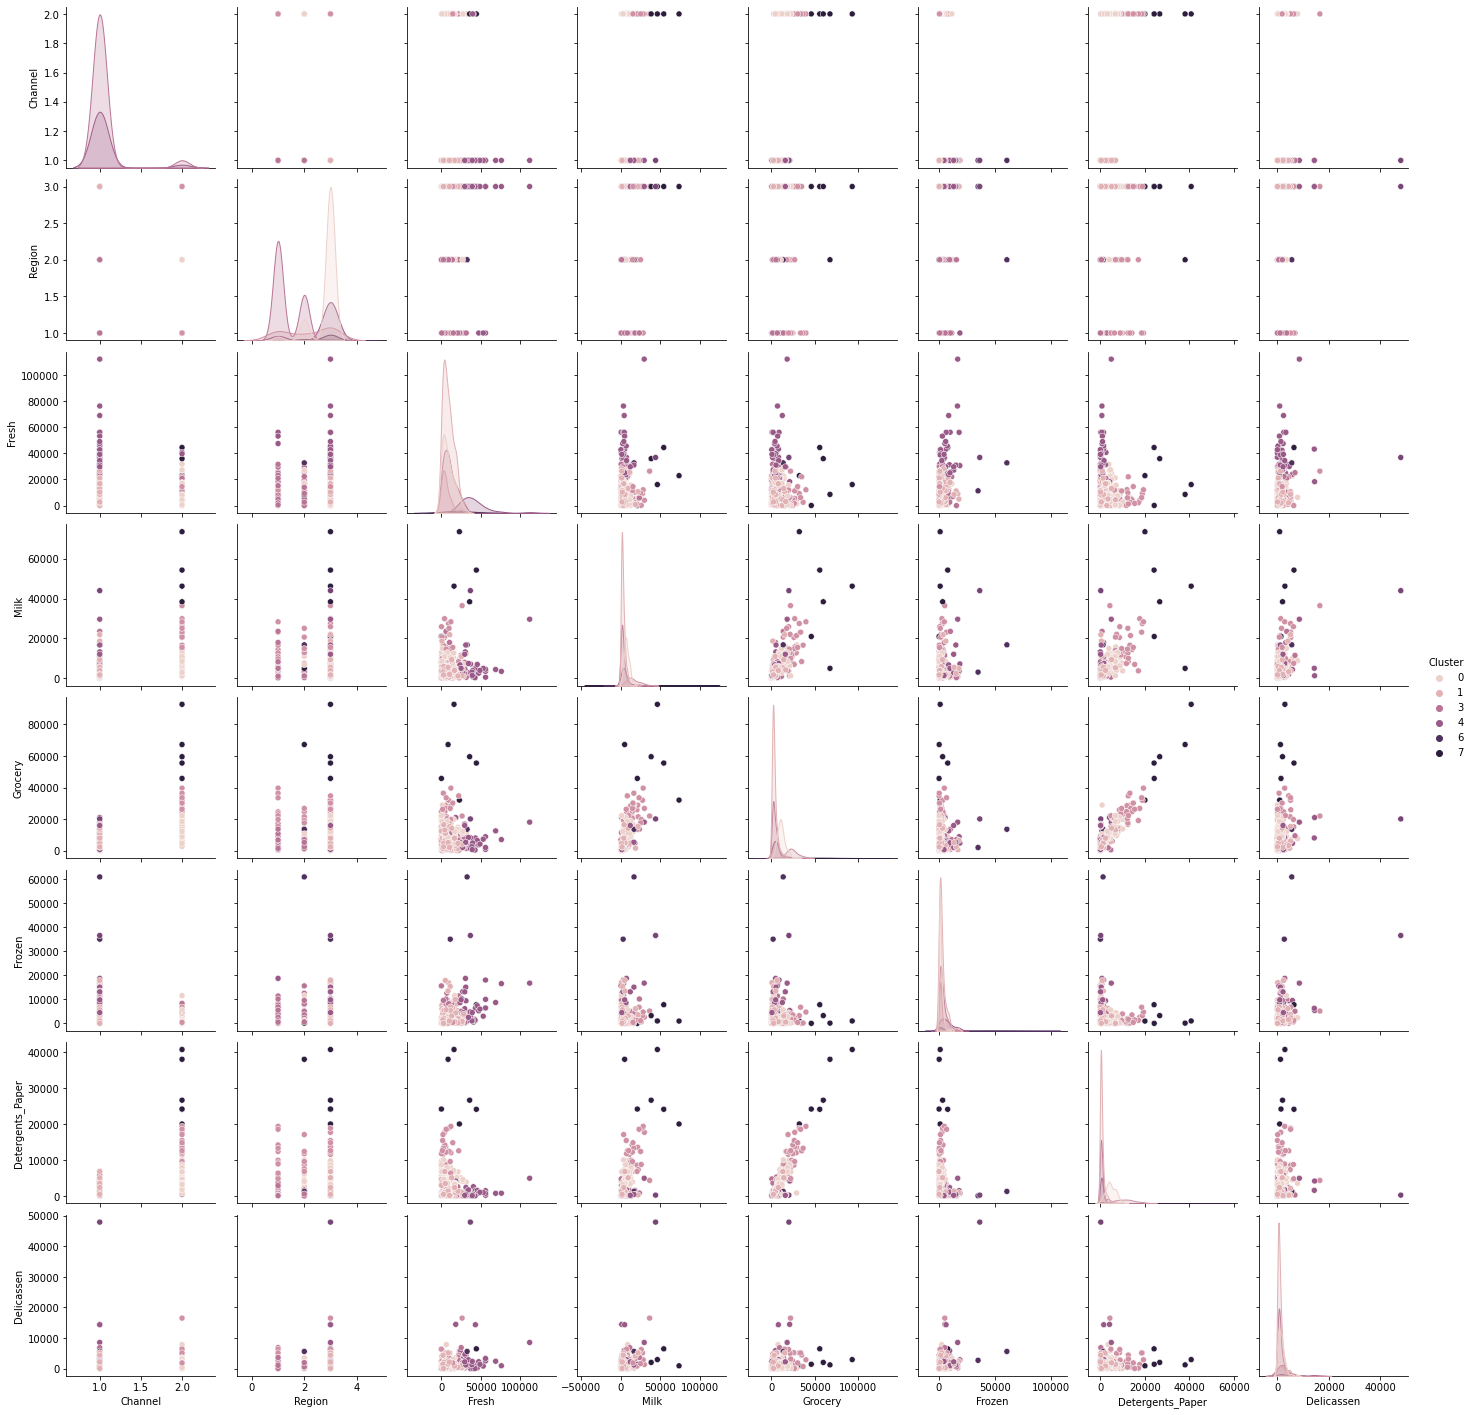

In [21]:
sns.pairplot(df,hue='Cluster')
plt.show()